# Business Case :-   FicZon wants to explore Machine Learning to pre-categorize the lead quality.

# ---:  PYTHON  ESSENTIALS :---

In [1]:
# Import required Libraries
import os
import numpy as np                
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Warnings to ignore features warnings
import warnings
warnings.filterwarnings('ignore')

# To Load data From SQL Server
import mysql.connector

In [6]:
# Fetch table from our data base and save in a variable
query = "select * from data"
data = pd.read_sql_query(query,connection)

In [7]:
# Print Data
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


# Domain Analysis :-
- **Created -**  Created is date and time on which the lead was generated.
- **Product_ID -** Product_ID is the Serial no. of the product.
- **Source -** Source ,from where the lead has generated like website , phonecall , email etc.
- **Mobile -** Mobile number of the lead or customer
- **EMAIL -** EMAIL of the lead.
- **Sales_Agent -** Sales_Agent is the agent who generated the lead.
- **Location -** Location is the address of the lead / from where the lead has generated.
- **Delivery_Mode -** how the product has deliveried to lead or what type of delivery mode.
- **Status -** Status of current lead .

# Basic checks :-

In [8]:
# To see first five Records
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [9]:
# To get information about data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


### Insights  from info() :-
- Created is Datetime Column but it is in Objective ( Convert it into datetime64).
- Product_ID is a integer but it is in float.
- Source  is a String with few missing values.
- Mobile number is an integer but it is in float with missing values .
- EMAIL is string.
- Sales_Agent , Location are objects with missing values.

In [10]:
# Check Statistical information about dataset
data.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


### Insights from Describe()  :-
- 25 types of Source are there but 2547 Leads were generated from Call Source only .
- Mobile number and EMAIl are not showing any information about leads but who provide
their information they are intrested in the products.
- 12 Sales Agents are there but Sales-Agent-4 only make 1500 Leads , i.e he is better than other.
- 2500 Leads were generated from other location .
- there have 5 different ways to delivery products but Mode-5 used for 2975 times , so this is the easiest & popular way .
- There are 11 different types of leads Status who were generated but 1536 leads were  junk  leads.

# --- :  EXPLORATORY DATA ANALYSIS  : ---

In [11]:
# Convert Created Column from object datatype to datetime data type

data['Created'] = data['Created'].astype('datetime64')

In [12]:
# Make a different columns for Year , Month , Date , Hour , Minute.
data['Year'] = data['Created'].dt.year
data['Month'] = data['Created'].dt.month
data['Day'] = data['Created'].dt.day
data['Hour'] = data['Created'].dt.hour
data['Minutes'] = data['Created'].dt.minute

In [13]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Year,Month,Day,Hour,Minutes
0,2018-11-14 10:05:00,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open,2018,11,14,10,5
1,2018-11-14 09:22:00,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open,2018,11,14,9,22
2,2018-11-14 09:21:00,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open,2018,11,14,9,21
3,2018-11-14 08:46:00,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,2018,11,14,8,46
4,2018-11-14 07:34:00,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,2018,11,14,7,34


## ( 1 ) .  Univariate Analysis :-

### ( i ) . Source :

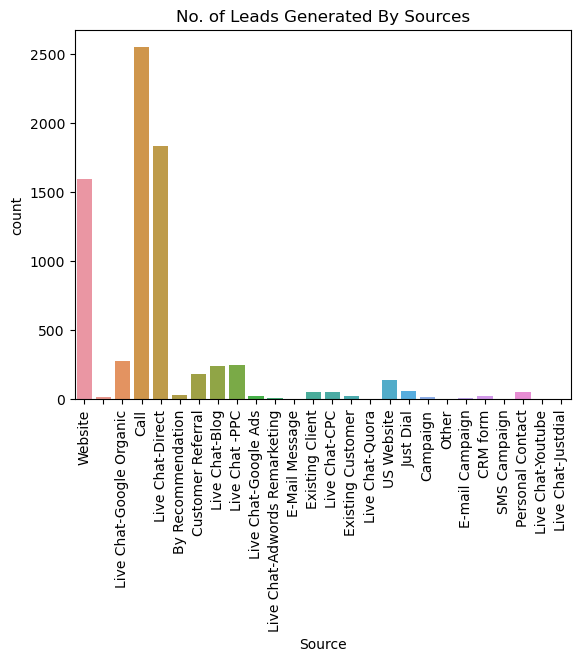

In [14]:
# Univariate Analysis For Source

sns.countplot(x=data.Source)
plt.title("No. of Leads Generated By Sources")
plt.xticks(rotation=90)
plt.show()

**Insights from Source:-**
- 34 % Leads were generarted from Call Source .
- 25 % Leads were Generated from live direct chat .
- 21 % Leads were generated from their Website .
- 11 % Leads were generated from Live chat in Google , PPC , Blog and US Website.
- remaining 10 % leads were generated from other sources .

### ( ii ) . Sales Agent :

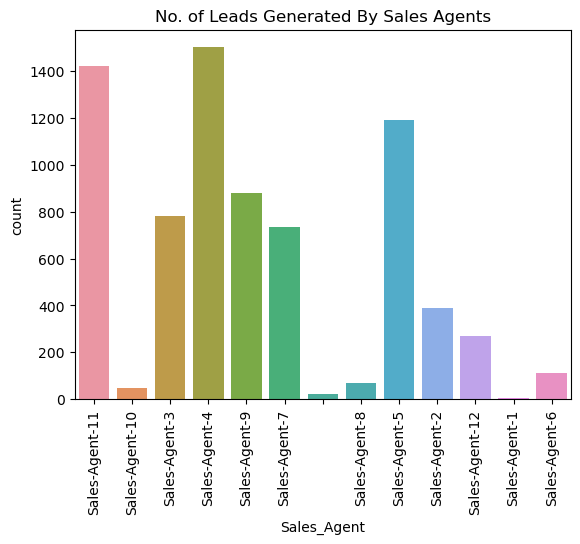

In [15]:
# Univariate analysis of Sales Agents
sns.countplot(x=data.Sales_Agent)
plt.title("No. of Leads Generated By Sales Agents")
plt.xticks(rotation=90)
plt.show()

#### Insights  For Sales Agent:-
- Agent-3 , Agent-4 , Agent-5 , Agent-7 , Agent-9 and Agent-11 togatherly Generated More than 87 %  Leads. 
- Agent-1 , Agent-2 , Agent-6 , Agent-8 , Agent-10 and Agent-12  are  togatherly Generated less than 13 %  Leads.

### ( iii ) . Location :

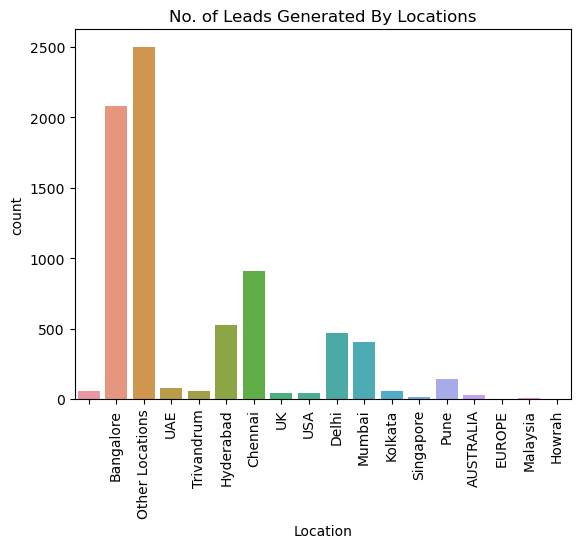

In [16]:
# Univariate Analysis for Location
sns.countplot(x=data.Location)
plt.title("No. of Leads Generated By Locations")
plt.xticks(rotation=90)
plt.show()

#### Insights from Location:-
- 33 % Leads were generated from Other Locations.
-  from Bangalore 28% and Chennai 12%  Leads were Generated.
- From Hyderabad 7% , Delhi 6% and Mumbai 5%  Leads were Generated.

### ( iv ) . Delivery Mode :

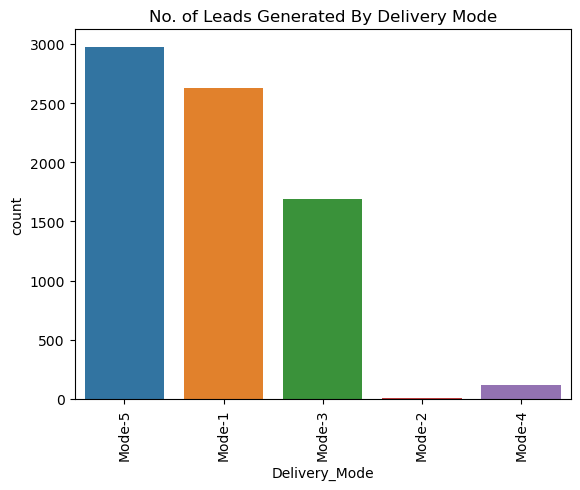

In [17]:
# Univariate analysis for Delivery Mode
sns.countplot(x=data.Delivery_Mode)
plt.title("No. of Leads Generated By Delivery Mode")
plt.xticks(rotation=90)
plt.show()

### Insights  from Delivery mode:-

- Most of Leads prefered Mode-5 , Mode-1 ,Mode-3

### ( v ) . Status Of Lead :

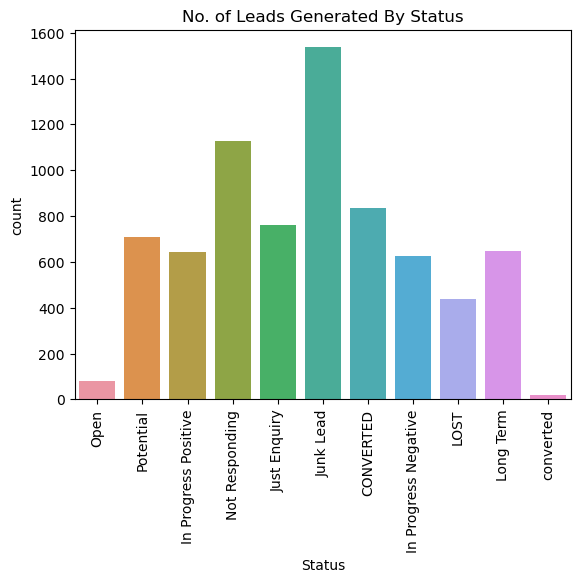

In [18]:
# Uniovariate Analysis for Status of Leads
sns.countplot(x=data.Status)
plt.title("No. of Leads Generated By Status")
plt.xticks(rotation=90)
plt.show()

#### Insights from Leads Status :-
- 20 %  Leads which are generated , they are Junk Leads.
- 15 % Leads were Not Responding.
- 11 % Leads got Convorted .(Successed)
- 10 % Leads are just Enquired.

### ( vi ) . Leads by Months :

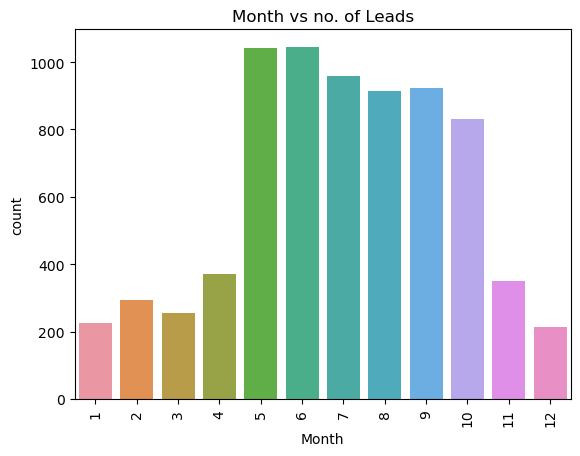

In [19]:
# Univariate analysis for Leads Generated by Month
sns.countplot(x=data.Month)
plt.xticks(rotation=90)
plt.title("Month vs no. of Leads")
plt.show()

#### Insights from Month:-
- 76%  Leads were generated between May to October month.

## ( 2 ) .  Bi - Variate Analysis :-

### Preprocessing for Bi-Variate Analysis :-

- According to Business Case we have to **combine target Classes** and differnciate into **Two Categories**.

- **High Potential** -  CONVERTED,Potential,In Progress Positive,converted .

- **Low Potential** - Junk Lead, Not Responding, Just Enquiry, Long Term, In Progress Negative, LOST and Open

In [20]:
# High Potential Leads

data.loc[data['Status']=="CONVERTED",'Status'] = "High Potential"
data.loc[data['Status']=='Potential',"Status"] = "High Potential"
data.loc[data['Status']=='In Progress Positive',"Status"] = "High Potential"
data.loc[data['Status']=="converted" , 'Status'] = "High Potential"


# Low POtential Leads

data.loc[data['Status']=="Junk Lead",'Status'] = "Low Potential"
data.loc[data['Status']=="Not Responding",'Status'] = "Low Potential"
data.loc[data['Status']=="Just Enquiry",'Status'] = "Low Potential"
data.loc[data['Status']=="Long Term",'Status'] = "Low Potential"
data.loc[data['Status']=='In Progress Negative',"Status"] = "Low Potential"
data.loc[data['Status']=="LOST",'Status'] = "Low Potential"
data.loc[data['Status']=='Open',"Status"] = "Low Potential"

In [21]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Year,Month,Day,Hour,Minutes
0,2018-11-14 10:05:00,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Low Potential,2018,11,14,10,5
1,2018-11-14 09:22:00,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Low Potential,2018,11,14,9,22
2,2018-11-14 09:21:00,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Low Potential,2018,11,14,9,21
3,2018-11-14 08:46:00,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Low Potential,2018,11,14,8,46
4,2018-11-14 07:34:00,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Low Potential,2018,11,14,7,34


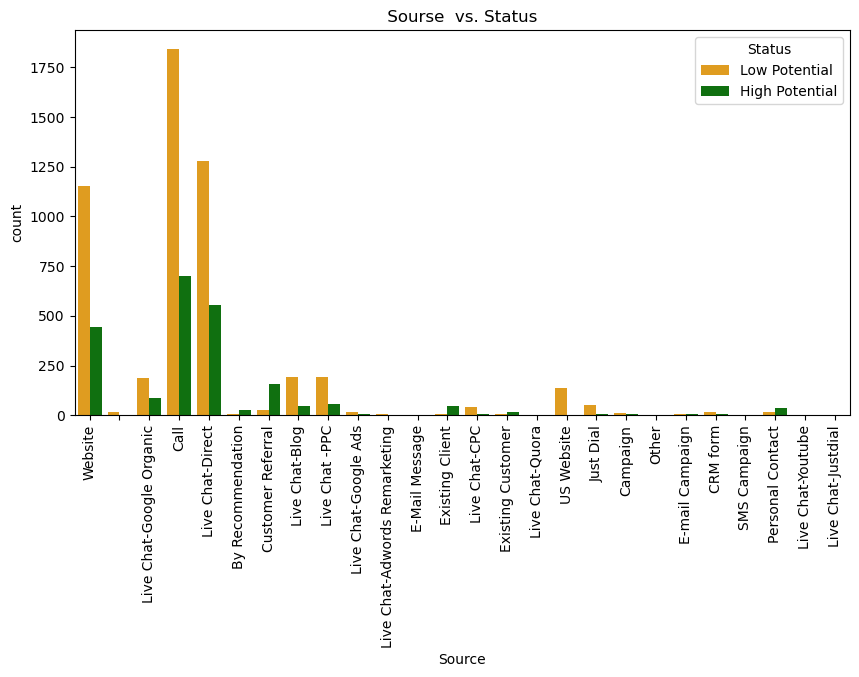

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x=data.Source,hue=data.Status,palette=['orange','green'])
plt.title(" Sourse  vs. Status ")
plt.xticks(rotation=90)
plt.show()

### Insights (Sources vs Status) :-

- Leads Generated by the following have high potential are :
                                      - by Recommendation 
                                      - Customer Referral 
                                      - Existing Client 
                                      - Existing Customer
                                      - Personal Contact
                                      
- Leads Generated By the following have approximately 50% Chance for High  Potential are :
          - Website
          - Live Chat Google Organic
          - Call
          - Live Chat Direct
          - Live Chat Blog
          - Live Chat PPC

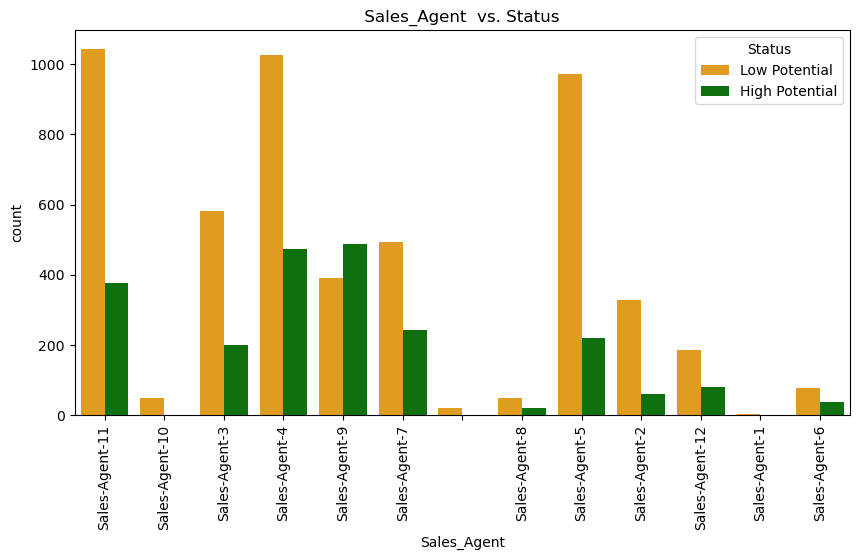

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x=data.Sales_Agent,hue=data.Status,palette=['orange','green'])
plt.title(" Sales_Agent  vs. Status ")
plt.xticks(rotation=90)
plt.show()

### Insights (Agent vs Potential):-
- Leads Generated by Sales-Agent-9 have High Potential.
- Leads Generated by Sales-Agent-10 and Sales-Agent-1 have Low Potential.
- Leads Generated by other Agents have more than 40 % High Potential .

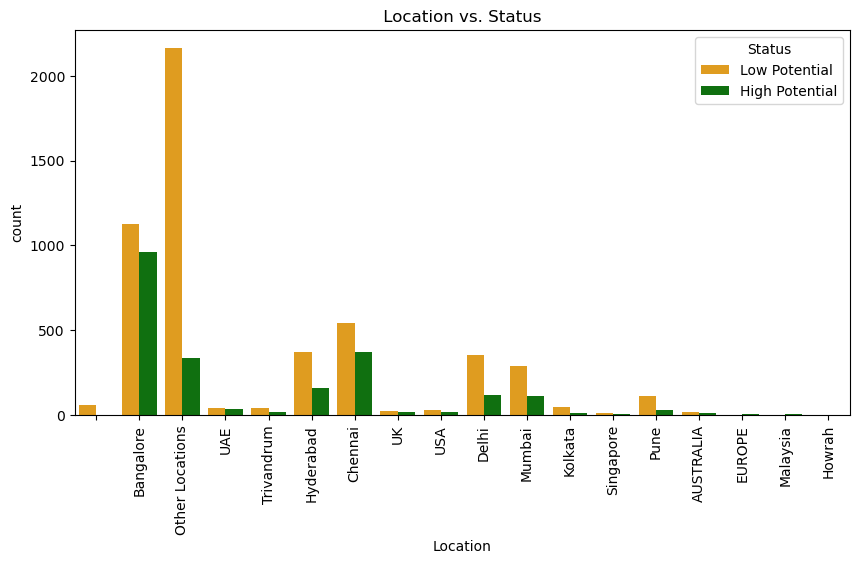

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x=data.Location,hue=data.Status,palette=['orange','green'])
plt.title(" Location vs. Status ")
plt.xticks(rotation=90)
plt.show()

### Insights (Loction vs Status ) :-
-  Leads Generated in Bangalore , UAE , UK , USA and AUSTRALIA having High Potential.
- only 40 % Leads have  High potential which Leads are Generated in Mumbai , Delhi , Hydrabad , Chennai and remaining 60 % has Low Potential

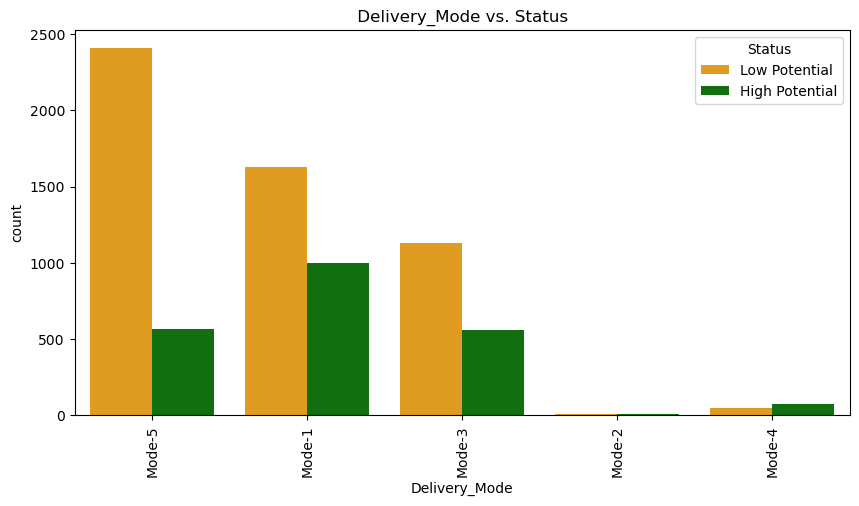

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x=data.Delivery_Mode,hue=data.Status,palette=['orange','green'])
plt.title(" Delivery_Mode vs. Status ")
plt.xticks(rotation=90)
plt.show()

### Insights (Delivery Mode vs. Status )  :-
- Leads who choose delivery MODE-5 , they have low chance of having High Potential as compared to other.
- High Potential Leads choose MODE-4 as delivery mode.n

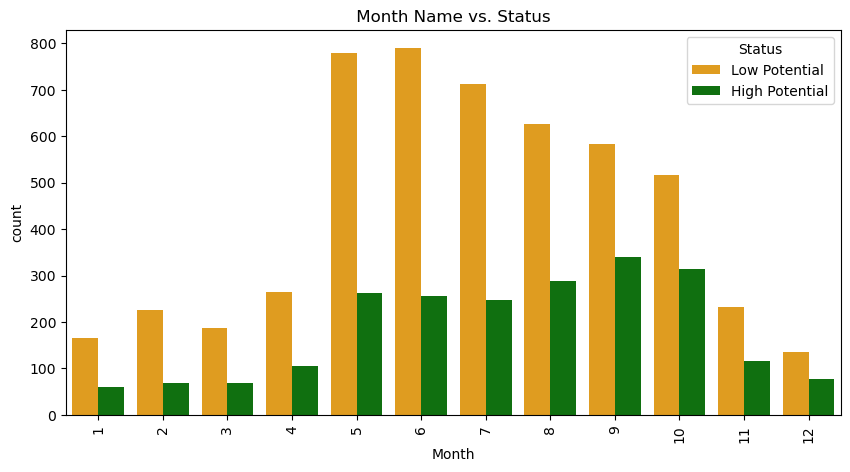

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x=data.Month,hue=data.Status,palette=['orange','green'])
plt.title(" Month Name vs. Status ")
plt.xticks(rotation=90)
plt.show()

### Insights (Month Name  vs  Status) :-
- Leads Not dependent on Month for High Potential or Low Potential

# --- :  DATA   PREPROCESSING  : ---

In [29]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Year,Month,Day,Hour,Minutes
0,,Website,Sales-Agent-11,,Mode-5,Low Potential,2018,11,14,10,5
1,,Website,Sales-Agent-10,,Mode-5,Low Potential,2018,11,14,9,22
2,,Website,Sales-Agent-10,,Mode-5,Low Potential,2018,11,14,9,21
3,,Website,Sales-Agent-10,,Mode-5,Low Potential,2018,11,14,8,46
4,,Website,Sales-Agent-10,,Mode-5,Low Potential,2018,11,14,7,34


In [28]:
# drop unnecessary columns which we created.
data.drop(['Created','Mobile','EMAIL'],axis=1,inplace=True)

## ( i ) . Handle currupt and Null Values :-

In [30]:
# Find null Values present in each columns and handle them
data.isnull().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
Year             0
Month            0
Day              0
Hour             0
Minutes          0
dtype: int64

In [31]:
# Change Space value with NaN.
for i in data.columns :
    data.loc[data[i]=='',i] = np.nan

In [32]:
# Find null Values present in each columns and handle them
data.isnull().sum()

Product_ID       58
Source           17
Sales_Agent      23
Location         58
Delivery_Mode     0
Status            0
Year              0
Month             0
Day               0
Hour              0
Minutes           0
dtype: int64

In [33]:
# Product_ID is in object so, change it into float data type
data['Product_ID'] = data['Product_ID'].astype('float')

In [34]:
## null values are there , so handle them.
data.loc[data['Product_ID'].isnull(),'Product_ID'] = data['Product_ID'].median()

data.loc[data['Source'].isnull(),'Source'] = data['Source'].mode()[0]
data.loc[data['Sales_Agent'].isnull(),'Sales_Agent'] = data['Sales_Agent'].mode()[0]
data.loc[data['Location'].isnull(),'Location'] = data['Location'].mode()[0]

##  (ii)  . CATEGORICAL TO NUMERICAL :-

#### Product_ID :-

In [142]:
# Value count for Source
data.Product_ID.value_counts()

18.0    1767
15.0    1494
19.0    1189
9.0      992
27.0     739
5.0      486
10.0     168
1.0      105
20.0     102
25.0      90
21.0      66
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
3.0        7
17.0       7
6.0        7
8.0        6
13.0       5
24.0       3
16.0       3
23.0       2
0.0        2
28.0       1
7.0        1
4.0        1
Name: Product_ID, dtype: int64

In [ ]:
data.Product_ID.replacel({22.0 : 0.0,3.0 : 0.0 , 17.0:0.0 , 6.0:0.0 , 8.0:0.0 , 13.0:0.0 ,
                          24.0:0.0 , 16.0:0.0 , 23.0:0.0 , 0.0:0.0 , 28.0:0.0 , 7.0:0.0 , 4.0:0.0})

#### Source :-

In [35]:
# Value count for Source
data.Source.value_counts()

Call                             2564
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source, dtype: int64

In [36]:
# combine below 12 value counts into one variable for better prediction
data.Source.replace({"Live Chat-Adwords Remarketing":"Other","Live Chat-Quora":"Other","SMS Campaign":"Other",
                     "Live Chat-Youtube":"Other","E-Mail Message":"Other","Live Chat-Justdial":"Other"},inplace=True)

In [37]:
data.Source.value_counts()

Call                        2564
Live Chat-Direct            1834
Website                     1594
Live Chat-Google Organic     274
Live Chat -PPC               249
Live Chat-Blog               237
Customer Referral            180
US Website                   137
Just Dial                     56
Existing Client               51
Live Chat-CPC                 50
Personal Contact              50
By Recommendation             32
CRM form                      23
Existing Customer             22
Live Chat-Google Ads          21
Campaign                      19
Other                         17
E-mail Campaign               12
Name: Source, dtype: int64

In [38]:
# manually change all categorical data to numerical
data.Source.replace({"Call":18,"Live Chat-Direct":17,"Website":16,"Live Chat-Google Organic":15,"Live Chat -PPC":14,
      "Live Chat-Blog":13,"Customer Referral":12,"US Website":11,"Just Dial":10,"Existing Client":9,"Live Chat-CPC":8,
      "Personal Contact":7,"By Recommendation":6,"CRM form":5,"Existing Customer":4,"Live Chat-Google Ads":3,"Campaign":2,
      "Other":1,"E-mail Campaign":0},inplace=True)

#### Sales Agents :-

In [39]:
data.Sales_Agent.value_counts()

Sales-Agent-4     1523
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

In [41]:
# Manually convert Categorical to numerical
data.Sales_Agent.replace({"Sales-Agent-4":11,"Sales-Agent-11":10,"Sales-Agent-5":9,"Sales-Agent-9":8,"Sales-Agent-3":7,
"Sales-Agent-7":6,"Sales-Agent-2":5,"Sales-Agent-12":4,"Sales-Agent-6":3,"Sales-Agent-8":2,"Sales-Agent-10":1,
                         "Sales-Agent-1":0},inplace=True)

#### Location:-

In [42]:
# value counts for Locations
data.Location.value_counts()

Other Locations    2558
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [43]:
# Combine low value counts Locations into Othere Location
data.Location.replace({"Malaysia":"Other Locations","EUROPE":"Other Locations","Howrah":"Other Locations"},inplace=True)

In [44]:
# Change categorical to numerical
data.Location.replace({"Other Locations":13,"Bangalore":12,"Chennai":11,"Hyderabad":10,"Delhi":9,"Mumbai":8,"Pune":7,"UAE":6,
"Trivandrum":5,"Kolkata":4,"USA":3,"UK":2,"AUSTRALIA":1,"Singapore":0},inplace=True)

#### Delivery Mode :-

In [45]:
# value counts for Delivery mode
data.Delivery_Mode.value_counts()

Mode-5    2975
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: Delivery_Mode, dtype: int64

In [46]:
# Manually convert Categorical to numerical
data.Delivery_Mode.replace({"Mode-5":4,"Mode-1":3,"Mode-3":2,"Mode-4":1,"Mode-2":0},inplace=True)

#### Status :-

In [47]:
# Value counts for Status
data.Status.value_counts()

Low Potential     5219
High Potential    2203
Name: Status, dtype: int64

In [48]:
# manually change to numerical
data['Status'] = data['Status'].map({'High Potential': 0 ,'Low Potential': 1})

## (iii) . Handle Outlier :-

In [49]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Year,Month,Day,Hour,Minutes
0,18.0,16,10,13,4,1,2018.0,11.0,14.0,10.0,5.0
1,18.0,16,1,13,4,1,2018.0,11.0,14.0,9.0,22.0
2,18.0,16,1,13,4,1,2018.0,11.0,14.0,9.0,21.0
3,18.0,16,1,13,4,1,2018.0,11.0,14.0,8.0,46.0
4,18.0,16,1,13,4,1,2018.0,11.0,14.0,7.0,34.0


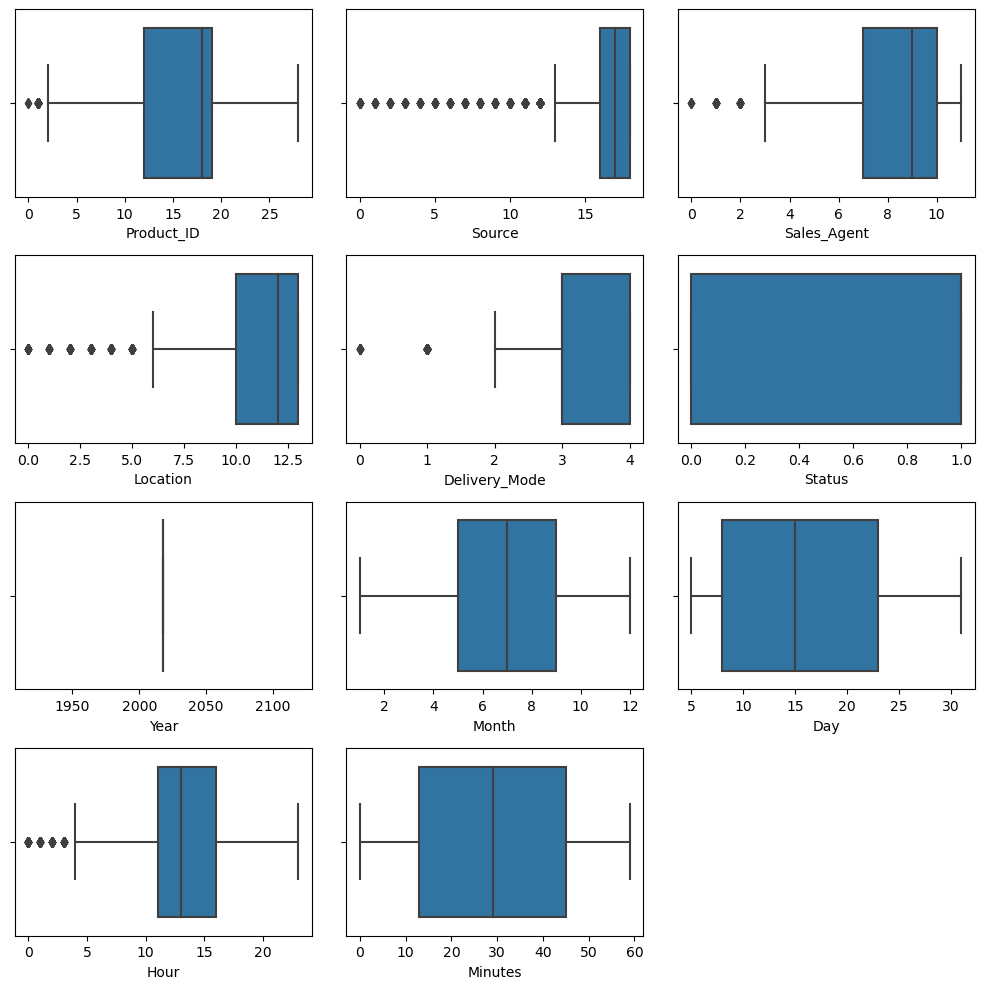

In [50]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in data.columns:
    plt.subplot(4,3,plotnumber)
    sns.boxplot(x = data[i])
    plotnumber = plotnumber + 1
plt.tight_layout()

#### Insights from Box-plot :
- we can not change any thing because these all are descrete values

## Scaling data

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data[['Month','Day','Hour','Minutes']] = pd.DataFrame(scaler.fit_transform(data[['Month','Day','Hour','Minutes']]))

In [52]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Year,Month,Day,Hour,Minutes
0,18.0,16,10,13,4,1,2018.0,1.543279,-0.264938,-0.821831,-1.365239
1,18.0,16,1,13,4,1,2018.0,1.543279,-0.264938,-1.068420,-0.382515
2,18.0,16,1,13,4,1,2018.0,1.543279,-0.264938,-1.068420,-0.440323
3,18.0,16,1,13,4,1,2018.0,1.543279,-0.264938,-1.315009,1.004859
4,18.0,16,1,13,4,1,2018.0,1.543279,-0.264938,-1.561598,0.311172


# --- :  FEATURE SELECTION  : ---

### ( i ) . Correlation Checking 

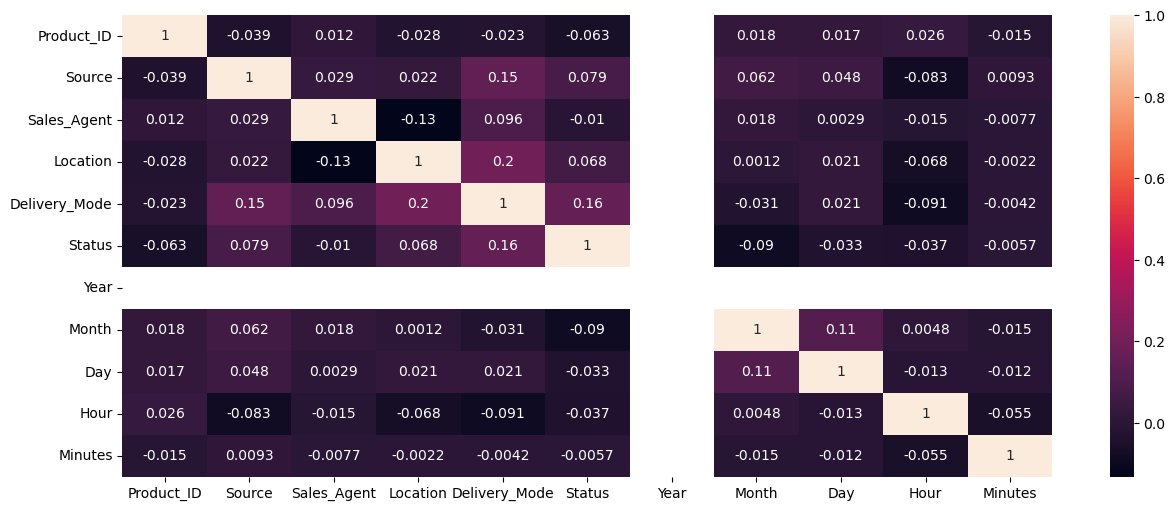

In [53]:
# Plot heatmap / corelation map to check corelation
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

### insights from Heatmap :-
- Year has one value , so it's not required.
- Minutes & Day_name has also little or no corelation with target class.

### ( ii ) Duplicate Value checking

In [54]:
# Calculate Total Duplicate values
data.duplicated().sum()

27

In [55]:
# Drop Duplicate Values for accurate prediction
data.shape

(7422, 11)

In [56]:
# Drop duplicate values to increase model accuracy
data.drop_duplicates(inplace=True)

In [57]:
# Drop Duplicate Values for accurate prediction
data.shape

(7395, 11)

In [58]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Year,Month,Day,Hour,Minutes
0,18.0,16,10,13,4,1,2018.0,1.543279,-0.264938,-0.821831,-1.365239
1,18.0,16,1,13,4,1,2018.0,1.543279,-0.264938,-1.068420,-0.382515
2,18.0,16,1,13,4,1,2018.0,1.543279,-0.264938,-1.068420,-0.440323
3,18.0,16,1,13,4,1,2018.0,1.543279,-0.264938,-1.315009,1.004859
4,18.0,16,1,13,4,1,2018.0,1.543279,-0.264938,-1.561598,0.311172


In [59]:
# Create dependent & Independent Features
X = data.drop(["Status","Year"],axis=1)
y = data["Status"]

### ( iii ) . Dependent & Independent variable Creating

In [60]:
# InDependent Variable
X.tail()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Month,Day,Hour,Minutes
7417,9.0,18,3,8,1,-1.124037,1.422931,-1.068420,0.947051
7418,15.0,18,4,13,4,-1.124037,1.422931,-1.068420,0.831437
7419,5.0,17,10,12,3,-1.124037,1.422931,-1.068420,-0.498130
7420,21.0,5,11,13,3,-1.124037,1.422931,-1.315009,-1.423046
7421,25.0,16,7,11,3,-1.124037,1.422931,-1.561598,1.467317


In [61]:
# Dependent Variable
y.tail()

7417    1
7418    1
7419    1
7420    1
7421    0
Name: Status, dtype: int64

### ( iv ) . Split Data into Train & Test

In [74]:
# Split data into train & test using train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=95)

# --- :   MODEL CREATION   : ---

## ( i ) . Logistic Regression :---

In [75]:
from sklearn.linear_model import LogisticRegression                  # Import Logistic regression
log = LogisticRegression(random_state=1)                                           # Create variable of Logistic regression
log.fit(X_train,y_train)                                             # Train data using Logistic regression
y_log_pr = log.predict(X_test)                                       # predict Target class

In [76]:
# print predicted values
y_log_pr

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [77]:
# original y values
y_test.values

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

### Model Evaluation:

In [78]:
# Import metrics to check performance of model
from sklearn.metrics import accuracy_score, classification_report

In [79]:
# Check model perfomancabse
Acc_log = accuracy_score(y_test,y_log_pr)
print(f'Accuracy of Logistic Regression is = {Acc_log}')

Accuracy of Logistic Regression is = 0.7315753887762001


In [80]:
# Classification report
print(classification_report(y_test,y_log_pr))

              precision    recall  f1-score   support

           0       0.43      0.06      0.10       390
           1       0.74      0.97      0.84      1089

    accuracy                           0.73      1479
   macro avg       0.59      0.51      0.47      1479
weighted avg       0.66      0.73      0.65      1479



## Over Sampling :-

In [85]:
# for balancing data use oversampling technique
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=38)
X_smote , y_smote = smote.fit_resample(X_train,y_train)

In [86]:
print("Before OverSampling, counts of label 'High Potential': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label 'Low Potential': {} \n".format(sum(y_train == 0)))
 
print("After OverSampling, counts of label 'High Potential': {}".format(sum(y_smote == 1)))
print("After OverSampling, counts of label 'Low Potential': {} \n".format(sum(y_smote == 0)))


Before OverSampling, counts of label 'High Potential': 4104
Before OverSampling, counts of label 'Low Potential': 1812 

After OverSampling, counts of label 'High Potential': 4104
After OverSampling, counts of label 'Low Potential': 4104 



### Model Evaluation after Data Balancing

In [87]:
# fit smote data & check performance
log.fit(X_smote,y_smote)                                             # Train data using Logistic regression
y_log = log.predict(X_test)    
acc_log_smote=accuracy_score(y_test,y_log)
print(f'Accuracy of Logistic Regression after Smoting is = {acc_log_smote}')

Accuracy of Logistic Regression after Smoting is = 0.6281271129141311


In [88]:
# Classification report
print(classification_report(y_test,y_log))

              precision    recall  f1-score   support

           0       0.36      0.54      0.43       390
           1       0.80      0.66      0.72      1089

    accuracy                           0.63      1479
   macro avg       0.58      0.60      0.58      1479
weighted avg       0.68      0.63      0.65      1479



## ( ii ) . K Nearest Neighbour :---

In [99]:
## calculate the error rate for no.of neighbours

from sklearn.neighbors import KNeighborsClassifier     # import KNeighbours Classifier

error_rate = []                                        # Create a empty list to store error rate 
for i in range(1,15):                                  # use for loop to iterate
    knn = KNeighborsClassifier(n_neighbors=i)          # define KNeighbour classifier
    knn.fit(X_smote,y_smote)                           # Train model with KNN
    pred_i = knn.predict(X_test)                       # predict test data
    error_rate.append(np.mean(pred_i != y_test))       # append the error rate on empty list

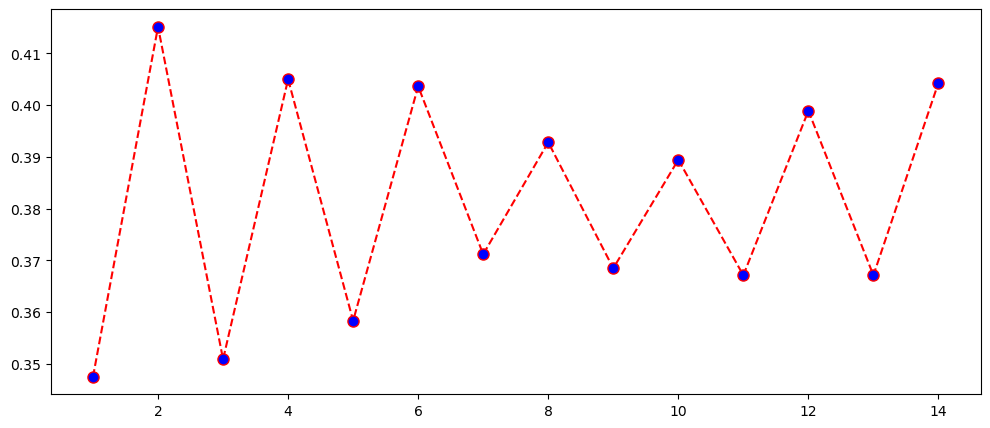

In [100]:
# Plot a line graph between error rate vs no.of neighbours
plt.figure(figsize=(12,5))
plt.plot(range(1,15),error_rate,color='red', linestyle='dashed', 
         marker='o',markerfacecolor='blue', markersize=8)
plt.show()

In [101]:
from sklearn.neighbors import KNeighborsClassifier        # import k_nearest neighbour
knn = KNeighborsClassifier(n_neighbors=3)                 # define the model with default parameters
knn.fit(X_smote,y_smote)                                  # train model with default parameters
y_pr_knn = knn.predict(X_test)                            # predict test data data 

# Check model performance
acc_knn =accuracy_score(y_test,y_pr_knn)
print(f'Accuracy of k nearest Neighbour = {acc_knn}')

Accuracy of k nearest Neighbour = 0.6490872210953347


In [104]:
# print classification report 
print(classification_report(y_test,y_pr_knn))

              precision    recall  f1-score   support

           0       0.39      0.60      0.47       390
           1       0.82      0.67      0.74      1089

    accuracy                           0.65      1479
   macro avg       0.61      0.63      0.61      1479
weighted avg       0.71      0.65      0.67      1479



#### Hyperparameter Tunning of KNN :

In [110]:
# define hyperparameter's for KNN
hyperpara_knn = {
    'n_neighbors':[3,5,7,9,11],                      # no. of neighbours
    'weights':['uniform', 'distance'],                 # how the wait calculated
    'metric':['minkowski','euclidean','manhattan']     # which typevof distance
}

# import GridSearchCV
from sklearn.model_selection import GridSearchCV

# define Grid with parameters
grid_knn = GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=3),     # which model 
                       param_grid=hyperpara_knn,              # parameters 
                       scoring='accuracy',                    # Scoring
                        cv=3,
                        verbose=3
                       )

# Train all parameters 
grid_knn.fit(X_smote,y_smote)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3] END metric=minkowski, n_neighbors=3, weights=uniform;, score=0.745 total time=   0.2s
[CV 2/3] END metric=minkowski, n_neighbors=3, weights=uniform;, score=0.746 total time=   0.2s
[CV 3/3] END metric=minkowski, n_neighbors=3, weights=uniform;, score=0.796 total time=   0.2s
[CV 1/3] END metric=minkowski, n_neighbors=3, weights=distance;, score=0.754 total time=   0.0s
[CV 2/3] END metric=minkowski, n_neighbors=3, weights=distance;, score=0.758 total time=   0.0s
[CV 3/3] END metric=minkowski, n_neighbors=3, weights=distance;, score=0.807 total time=   0.0s
[CV 1/3] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.726 total time=   0.2s
[CV 2/3] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.747 total time=   0.2s
[CV 3/3] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.776 total time=   0.2s
[CV 1/3] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.744 tota

[CV 3/3] END metric=manhattan, n_neighbors=11, weights=uniform;, score=0.752 total time=   0.3s
[CV 1/3] END metric=manhattan, n_neighbors=11, weights=distance;, score=0.751 total time=   0.1s
[CV 2/3] END metric=manhattan, n_neighbors=11, weights=distance;, score=0.765 total time=   0.2s
[CV 3/3] END metric=manhattan, n_neighbors=11, weights=distance;, score=0.790 total time=   0.2s


GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [111]:
print(f'Best Score is : {grid_knn.best_score_}')
print(f'Best Parameters : {grid_knn.best_params_}')

Best Score is : 0.7914230019493177
Best Parameters : {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [112]:
# train the K nearest neighbour model with best parameters
knn_hyp = KNeighborsClassifier(n_neighbors=3,weights='distance',metric='manhattan')
knn_hyp.fit(X_smote,y_smote)
y_hyp_knn = knn_hyp.predict(X_test)

acc_hyp_knn = accuracy_score(y_test,y_hyp_knn)
print(f'Accuracy of K_nearest Neighbour after hyperparameter = {acc_hyp_knn}')

Accuracy of K_nearest Neighbour after hyperparameter = 0.6592292089249493


## ( iii ) . Support Vector Machine :---

In [114]:
from sklearn.svm import SVC                       # import support vector 
svm = SVC(random_state=1)                        # make a variable of SVC
svm.fit(X_smote,y_smote)                          # train SVC model with data
y_svm = svm.predict(X_test)                       # predict 

acc_svm = accuracy_score(y_test,y_svm)
print(f'Accuracy of Support Vector : {acc_svm}')

Accuracy of Support Vector : 0.5983772819472617


### Hyperparameter Tunning of Support Vector :

In [ ]:
# define parameters for Support vector
hyperpara_svm =  {
    'C' : [10,1.0 , 0.1 , 0.001],             # 
    'kernel' : ['linear', 'rbf', 'sigmoid'],
    'gamma' : [10,1,0.1]
}

# import Grid SearchCV
from sklearn.model_selection import GridSearchCV

# Define GridSearchCV
grid_svm = GridSearchCV(estimator=SVC(random_state=0), 
                       param_grid=hyperpara_svm,
                       scoring='accuracy',
                       cv=3,
                       verbose=3,
                       n_jobs=-1 )          

# train the GridSearchCV
grid_svm.fit(X_smote,y_smote)

print(f'Best Score is : {grid_svm.best_score_}')
print(f'Best Parameters : {grid_svm.best_params_}')

In [115]:
# Train Support Vector Classifier with best Parameters, which we got by doing hyperparameter tunning

svm_hyp = SVC(C=0.1,kernel='rbf',gamma=10,random_state=99)
svm_hyp.fit(X_smote,y_smote)
y_hyp_svm = svm_hyp.predict(X_test)

acc_hyp_svm = accuracy_score(y_test,y_hyp_svm)
print(f'Accuracy of Support Vector after hyperparameter = {acc_hyp_svm}')

Accuracy of Support Vector after hyperparameter = 0.7349560513860717


## ( iv ) . Decision Tree :---

In [118]:
from sklearn.tree import DecisionTreeClassifier     # import Decision tree Classifier
tree = DecisionTreeClassifier(random_state=91)       # define decision tree 
tree.fit(X_smote,y_smote)                           # Train Decision tree with default parameters
y_tree = tree.predict(X_test)                       # predict y_test for check model performance

acc_tree = accuracy_score(y_test,y_tree)
print(f'Accuracy of Decision Tree = {acc_tree}')

Accuracy of Decision Tree = 0.6869506423258959


### Hyperparameter Tunning of Decision Tree :

In [119]:
# Define hyperparameter's for Decision Tree Classifier
hyperpara_tree  =  {
    'criterion' : ["gini", "entropy"],
    'splitter' : ["best", "random"],
    "max_depth":[10,20,30,40],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' : [1,2,3]
}

# import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Define RandomizedSearchCV
random_tree = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=91),
                                 param_distributions=hyperpara_tree,
                                 n_jobs = -1,
                                 scoring = 'accuracy',
                                 cv=3,
                                 verbose=3
                                )
# train RandomizedSearchCV
random_tree.fit(X_smote,y_smote)


print(f'Best Score is : {random_tree.best_score_}')
print(f'Best Parameters : {random_tree.best_params_}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Score is : 0.7239278752436648
Best Parameters : {'splitter': 'random', 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'gini'}


In [126]:
# Train Decision Tree Classifier with above best parameters and make prediction.
tree_hyp = DecisionTreeClassifier(criterion='gini',
                                 splitter='random',
                                 min_samples_split=4,
                                 min_samples_leaf=1,
                                 max_depth=20,
                                 random_state=23)
tree_hyp.fit(X_smote,y_smote)
y_hyp_tree = tree_hyp.predict(X_test)

acc_hyp_tree = accuracy_score(y_test,y_hyp_tree)
print(f'Accuracy of Decision Tree after hyperparameter = {acc_hyp_tree}')

Accuracy of Decision Tree after hyperparameter = 0.6862745098039216


## ( v ) . Random Forest :---

In [129]:
from sklearn.ensemble import RandomForestClassifier     # import Random Forest Classifier
r_forest = RandomForestClassifier(random_state=88)       # define Random forest
r_forest.fit(X_smote,y_smote)                           # Train Random forest
y_pr_forest = r_forest.predict(X_test)                  # predict y_test
acc_forest = accuracy_score(y_test,y_pr_forest)
print(f'Accuracy of random forest = {acc_forest}')

Accuracy of random forest = 0.751183231913455


### Hyperparameter tunning for Random Forest :

In [114]:
# define Parameters required for Random Forest for hyperpameter tunning
hyperpara_forest  =  {
    'n_estimators' : [int(x) for x in np.linspace(200,2000,10)],
    'max_depth' : [int(x) for x in np.linspace(10, 110, num=11)],
    'min_samples_split' : [2,5,7,10],
    'min_samples_leaf' : [1,2,3,4],
    'max_features' : ["sqrt", "auto"] 
}

# import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Define RandomizedSearchCV
grid_forest = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0),
                                 param_distributions=hyperpara_forest ,
                                  n_iter=100 ,
                                  n_jobs=-1 ,
                                  verbose=1 ,
                                  cv = 3 ,
                                  scoring='accuracy'
                             )
# Train RandomizedSearchCV
grid_forest.fit(X_smote,y_smote)

print(f'Best Score is : {grid_forest.best_score_}')
print(f'Best Parameters : {grid_forest.best_params_}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits



KeyboardInterrupt



In [130]:
# Train Randomforestclassifier with best parameters
r_forest_hyp = RandomForestClassifier(n_estimators =  200,
                                     min_samples_split = 7,
                                     min_samples_leaf = 5,
                                     max_features =  'sqrt',
                                     criterion = 'entropy',
                                     random_state=0)
r_forest_hyp.fit(X_smote,y_smote)
y_hyp_forest = r_forest_hyp.predict(X_test)

acc_hyp_forest = accuracy_score(y_test,y_hyp_forest)
print(f'Accuracy of Random Forest after hyperparameter = {acc_hyp_forest}')

Accuracy of Random Forest after hyperparameter = 0.7437457741717377


In [131]:
for i in range(101):
    lg = RandomForestClassifier(n_estimators =  200,
                                     min_samples_split = 7,
                                     min_samples_leaf = 5,
                                     max_features =  'sqrt',
                                     criterion = 'entropy',
                                     random_state=i)                     
    lg.fit(X_smote,y_smote)                                            
    ylg = lg.predict(X_test)                                       
    ac = accuracy_score(y_test,ylg)
    print("random",i,"accuracy: ",ac)

random 0 accuracy:  0.7437457741717377
random 1 accuracy:  0.7450980392156863



KeyboardInterrupt



## ( vi ) . Gradient Boosting :-

In [132]:
from sklearn.ensemble import GradientBoostingClassifier    # import Gradient Booster
gboost = GradientBoostingClassifier(random_state=99)       # define Gradient booster with bydefault parameters
gboost.fit(X_smote,y_smote)                                # Train  Gradient boost 
y_gboost = gboost.predict(X_test)                          # make prediction for y_test
acc_gboost = accuracy_score(y_test,y_gboost)
print(f'Accuracy of Gradient Boosting = {acc_gboost}')

Accuracy of Gradient Boosting = 0.7241379310344828


### Hyperparameter Tunning of Gradient Boost :

In [ ]:
# define parameters required for hyperparameter Tunninng for Random forest classifier
hyperpara_gboost  =  {
    'learning_rate' : [100,10,1,0.1,0.001],
    'n_estimators' : [int(x) for x in np.linspace(100,2000,10)],
    'criterion' : ['friedman_mse', 'squared_error'],
    'min_samples_split' : [2,3,5,7],
    'min_samples_leaf' : [1,2,3,4,5]
}# Impoort RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Define RandomizedSearchCV
grid_gboost = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=0),
                   param_distributions=hyperpara_gboost,
                   scoring='accuracy',
                    n_iter=100,
                   verbose=2,
                   cv=3,
                    n_jobs=-1
                   )
# Train VRandomizedSearchCV
grid_gboost.fit(X_smote,y_smote)

print(f'Best Score is : {grid_gboost.best_score_}')
print(f'Best Parameters : {grid_gboost.best_params_}')

In [134]:
# Train Random Forest Classifier with Best Parameters
gboost_hyp = GradientBoostingClassifier(n_estimators =  150,
                                     min_samples_split = 9,
                                     min_samples_leaf = 7,
                                    learning_rate=0.3 ,
                                     criterion = 'friedman_mse',
                                     )
gboost_hyp.fit(X_smote,y_smote)
y_hyp_gboost = gboost_hyp.predict(X_test)

acc_hyp_boost = accuracy_score(y_test,y_hyp_gboost)
print(f'Accuracy of Gradient Boost after hyperparameter = {acc_hyp_boost}')

Accuracy of Gradient Boost after hyperparameter = 0.7538877620013522


## ( vii ) . XG - Boost :---

In [135]:
from xgboost import XGBClassifier             # import xgboost
xgb = XGBClassifier()                         # Define xgboost
xgb.fit(X_smote,y_smote)                      # Train Xgboost
y_xgb = xgb.predict(X_test)                   # make prediction for y_test
acc_xgb = accuracy_score(y_test,y_xgb)
print(f'Accuracy of XG - Boost = {acc_xgb}')

Accuracy of XG - Boost = 0.742393509127789


### Hyperparameter Tunning of XG-Boost :

In [ ]:
# import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# define hyperparameters required for XGboost
param_grid = {'gamma': [1,0.1,0.2,0.3,0.001,0.0001],
              'learning_rate': [ 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [100,150,200,250,300],
              'reg_alpha': [0.1,0.2,0.4,0.8,1.6,3.2,6.4],
              'reg_lambda': [0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

# Define XGBoost
random_cv_xgb = RandomizedSearchCV(estimator=XGBClassifier(ra), scoring='accuracy',param_distributions=param_grid, n_iter=100, cv=3,verbose=1,
                              random_state=42, n_jobs=-1)

# Train Xgboost
random_cv_xgb.fit(X_smote,y_smote)

print("XGB best score : ",random_cv_xgb.best_score_)
print("XGB best parameter : ",random_cv_xgb.best_params_)

In [136]:
# Train XGBoost with best parameters
xgb_hyp = XGBClassifier(n_estimators =  500,
                        reg_lambda =  0.001 ,
                        reg_alpha=0.6 ,
                        learning_rate=0.1 ,
                        max_depth = 9,
                        gamma=0.01,
                       )

xgb_hyp.fit(X_smote,y_smote)
y_hyp_xgb = xgb_hyp.predict(X_test)

acc_hyp_xgb = accuracy_score(y_test,y_hyp_xgb)
print(f'Accuracy of XG - Boost after hyperparameter = {acc_hyp_xgb}')

Accuracy of XG - Boost after hyperparameter = 0.7390128465179175


## ( vii ) . Artificial Neural Network :---

In [137]:
from sklearn.neural_network import MLPClassifier  # import neural network
ann = MLPClassifier(random_state=2)              # Define Neural network
ann.fit(X_smote,y_smote)                          # Train Neural network
y_ann = ann.predict(X_test)                       # make prediction for y_test

acc_ann = accuracy_score(y_test,y_ann)
print(f'Accuracy Score of ANN is : {acc_ann}')

Accuracy Score of ANN is : 0.5841784989858012


### Hyperparameter Tunning of Artificial Neural Network :

In [ ]:
# Define Hyperparameters required for Artificial neural network
hyperpara_ann  =  {
    'hidden_layer_sizes' : [(100,50),(200,100,50),(250,180,70)],
    'activation' : ['identity', 'logistic', 'relu'],
    'alpha' : [0.0001,0.001,0.01,0.1,1],
    'batch_size':[100,200,300,400], 
    'max_iter' : [200,400,500,600,800]
                            }    
# import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Define RandomizedSearchCV
random_cv_ann = RandomizedSearchCV(estimator=MLPClassifier(random_state=5),
                                  param_distributions=hyperpara_ann,
                                  n_iter=100,
                                  n_jobs=-1,
                                  cv=1,
                                  verbose=1)
# Train RandomizedSearchCV
random_cv_ann.fit(X_smote,y_smote)



print("ANN best score : ",random_cv_ann.best_score_)
print("ANN best parameter : ",random_cv_ann.best_params_)

In [138]:
# Train Artificial neural Network with best parameters
ann_hyp = MLPClassifier(hidden_layer_sizes=(200,100,2),
                       activation='relu',
                       alpha=0.1,
                       batch_size=150,
                       max_iter=150,learning_rate_init=0.01)

ann_hyp.fit(X_smote,y_smote)
y_hyp_ann = ann_hyp.predict(X_test)

acc_hyp_ann = accuracy_score(y_test,y_hyp_xgb)
print(f'Accuracy of Artificial Neural Network after hyperparameter = {acc_hyp_ann}')

Accuracy of Artificial Neural Network after hyperparameter = 0.7390128465179175


## Naive Bayes

In [139]:
from sklearn.naive_bayes import BernoulliNB,CategoricalNB,GaussianNB   # import Naive Bayes

N_bayes = BernoulliNB()                # Define Naive Bayes
N_bayes.fit(X_smote,y_smote)             # Train Naive Bayes
y_Bayes = N_bayes.predict(X_test)       # make prediction for naive Bayes

acc_naive_bayes = accuracy_score(y_test,y_Bayes)         # Check Performance
print(f'Accuracy of Naive Bayes is {acc_naive_bayes}')

Accuracy of Naive Bayes is 0.48208248816768084


# ...............................................  RESULTS  ...............................................

In [140]:
results = pd.DataFrame({
    'Models' : ['Logistic Regression','K_nearest Neighbour','Support Vector','Decision Tree','Random Forest',
                'Gradient Booster','XG-Booster','Neural Network','Naive Bayes'] ,
    
    'Accuracy' : [acc_log_smote, acc_knn, acc_svm, acc_tree, acc_forest, acc_gboost, acc_xgb, acc_ann, acc_naive_bayes] ,
    
    'Hyperparameter' : [np.nan , acc_hyp_knn ,acc_hyp_knn ,acc_hyp_tree ,acc_hyp_forest ,acc_hyp_boost ,
                        acc_hyp_xgb ,acc_hyp_ann, np.nan]
})

In [141]:
results

,Models,Accuracy,Hyperparameter
0,Logistic Regression,0.628127,NaN
1,K_nearest Neighbour,0.649087,0.659229
2,Support Vector,0.598377,0.659229
3,Decision Tree,0.686951,0.686275
4,Random Forest,0.751183,0.743746
5,Gradient Booster,0.724138,0.753888
6,XG-Booster,0.742394,0.739013
7,Neural Network,0.584178,0.739013
8,Naive Bayes,0.482082,NaN
